# Appointment Analysis for Brazil 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Munging</a></li>
<li><a href="#eda">EDA and Answers</a></li>
<li><a href="#eda">Conclusion</a></li>
</ul>

# Introduction

## Data Source & Attributes

"This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row."

Data Source : Udacity-Data Analist Nanodegree Program & https://www.kaggle.com/joniarroba/noshowappointments

|Attributes|Describtion|Data Type|
|:-----------:|:----------------------------:|:----------------------------:|
|PatientId|identification of the patient|numeric|
|AppointmentID|identification of the appointment|numeric|
|Gender|gender of the patient as M or F|string|
|ScheduledDay|what day the patient set up their appointment|---|
|AppointmentDay|the day of patient should actually go for treatment|---|
|Age|age of the patient|numeric|
|Neighbourhood| the location of the hospital|string|
|Scholarship|whether or not the patient is enrolled in Brasilian welfare program `Bolsa Família`|boolean|
|Hipertension|true or false|boolean|
|Diabetes|true or false|boolean|
|Alcoholism|true or false|boolean|
|Handcap|true or false|boolean|
|SMS_received|1 or more messages sent to the patient|boolean|
|No-show|it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.|string|


## Questions related to the data

Q1: Is there any relation between the age of the patient and having a delay on the date of appointment.

Q2: Is there any relation between gender and delaying appointment?

Q3: Do people delay more their appointment when they have no-scholarship?

Q4: Is there any relationship between gender have scholarship and delay the appointment?

Q5: Which gender has more appointment in which illness?

Q6: Does a person suffer from alcoholism tend to delay appointments?

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Munging

## Gathering Data

In [2]:
df = pd.read_csv('./data/dataset.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Assessing Data 

In [3]:
df.shape

(110527, 14)

* There are 110.527 patient records having appointment.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


* The oldest patient is 115 years old and the youngest one is an unborn baby. The majority of them are between 37 and 55 years old.
* Only 9 percent of the patients have scholarship.
* The patients have appointments for hipertension as 19 percent, for diabetes as 7 percent, and for alcoholism as 3 percent  appointments.
* Mostly, patients older than 55 have SMS one or more.
* The majority of patients are delayed their appointment 4 to 15 days, on average it is delayed 10 days.

array([[<AxesSubplot:title={'center':'PatientId'}>,
        <AxesSubplot:title={'center':'AppointmentID'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Scholarship'}>,
        <AxesSubplot:title={'center':'Hipertension'}>,
        <AxesSubplot:title={'center':'Diabetes'}>],
       [<AxesSubplot:title={'center':'Alcoholism'}>,
        <AxesSubplot:title={'center':'Handcap'}>,
        <AxesSubplot:title={'center':'SMS_received'}>]], dtype=object)

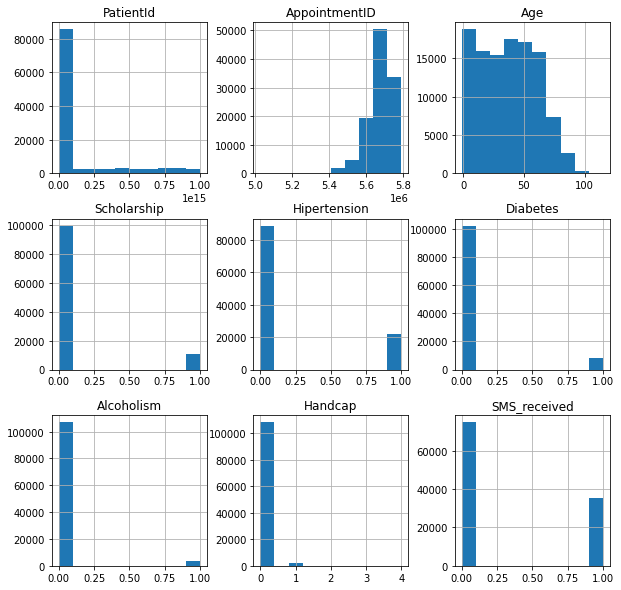

In [5]:
df.hist(figsize=(10,10))

Most people did not received SMS, majority of the reasons to have an appointment accordingly hipertension,diabetes, and alcoholism. Moreover, the day of delay generally less than a month.

* I need to extract date from timestamp (both for scheduled day and appointment day).

In [6]:
from datetime import datetime

In [7]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"])
df["ScheduledDay"]

0        2016-04-29 18:38:08+00:00
1        2016-04-29 16:08:27+00:00
2        2016-04-29 16:19:04+00:00
3        2016-04-29 17:29:31+00:00
4        2016-04-29 16:07:23+00:00
                    ...           
110522   2016-05-03 09:15:35+00:00
110523   2016-05-03 07:27:33+00:00
110524   2016-04-27 16:03:52+00:00
110525   2016-04-27 15:09:23+00:00
110526   2016-04-27 13:30:56+00:00
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns, UTC]

In [8]:
df["Schedule"] = df["ScheduledDay"].dt.date
df["Schedule"]

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-05-03
110523    2016-05-03
110524    2016-04-27
110525    2016-04-27
110526    2016-04-27
Name: Schedule, Length: 110527, dtype: object

In [9]:
df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"])
df["AppointmentDay"]

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

In [10]:
df["Appointment"] = df["AppointmentDay"].dt.date
df["Appointment"]

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-06-07
110523    2016-06-07
110524    2016-06-07
110525    2016-06-07
110526    2016-06-07
Name: Appointment, Length: 110527, dtype: object

I would like to add a new column called `Delay` to calculate the number of days if there was a delay in appointment.

In [11]:
df['Delay'] = (df['Appointment'] - df['Schedule']).dt.days

### Grouping attitude for appointment as `earlier`, `ontime` and `delayed`

In [12]:
earlier = df.Delay < 0
ontime = df.Delay == 0
delayed = df.Delay > 0

## Data Cleaning

### Cleaning Column Labels

I do not need `AppointmentDay` and `ScheduledDay` anymore, also there are some columns that I am planning not to use listed as `PatientId`, `AppointmentID`, and `Handcap`.

In [13]:
df.drop(['PatientId', 'AppointmentID', 'Handcap', 'ScheduledDay', 'AppointmentDay' ], axis=1, inplace = True)

I will replace `Male` with `0` and `Female` with `1` to see on graph.|

In [14]:
df['Gender'].replace(['M','F'], [0,1] ,inplace=True)
df

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Schedule,Appointment,Delay
0,1,62,JARDIM DA PENHA,0,1,0,0,0,No,2016-04-29,2016-04-29,0
1,0,56,JARDIM DA PENHA,0,0,0,0,0,No,2016-04-29,2016-04-29,0
2,1,62,MATA DA PRAIA,0,0,0,0,0,No,2016-04-29,2016-04-29,0
3,1,8,PONTAL DE CAMBURI,0,0,0,0,0,No,2016-04-29,2016-04-29,0
4,1,56,JARDIM DA PENHA,0,1,1,0,0,No,2016-04-29,2016-04-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,1,56,MARIA ORTIZ,0,0,0,0,1,No,2016-05-03,2016-06-07,35
110523,1,51,MARIA ORTIZ,0,0,0,0,1,No,2016-05-03,2016-06-07,35
110524,1,21,MARIA ORTIZ,0,0,0,0,1,No,2016-04-27,2016-06-07,41
110525,1,38,MARIA ORTIZ,0,0,0,0,1,No,2016-04-27,2016-06-07,41


### Dropping Nulls

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  int64 
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   SMS_received   110527 non-null  int64 
 8   No-show        110527 non-null  object
 9   Schedule       110527 non-null  object
 10  Appointment    110527 non-null  object
 11  Delay          110527 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 10.1+ MB


* There is no missing value. So, no need to fill or drop NAs.

# EDA

### Q1: Is there any relation between the age of the patient and having a delay on the date of appointment.


In [16]:
df.Age[delayed].mean() 

38.502563960032795

In [17]:
df.Age[ontime].mean()

34.45139122993543

In [18]:
df.Age[earlier].mean()

33.4

It is seen that younger than 35 age people are more careful about not delaying their appointments. Let's see the distribution of them.

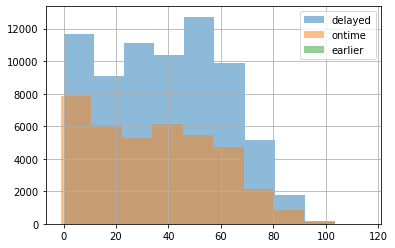

In [19]:
df.Age[delayed].hist(alpha=0.5,bins=10, label='delayed')
df.Age[ontime].hist(alpha=0.5,bins=10, label='ontime')
df.Age[earlier].hist(alpha=0.5,bins=10, label='earlier')
plt.legend();

**Answer 1: According to the distribution graph, there people averagely came on time in the age of 34 but also there are a lot of people who delayed in that age, too.**

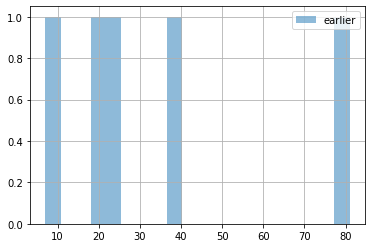

In [20]:
df.Age[earlier].hist(alpha=0.5,bins=20, label='earlier')
plt.legend();

We cannot say younger person comes 'earlier' then their appointment.

## Q2: Is there any relation between gender and delaying appointment?


In [21]:
df.groupby('Gender').Delay.mean()

Gender
0     9.593197
1    10.501698
Name: Delay, dtype: float64

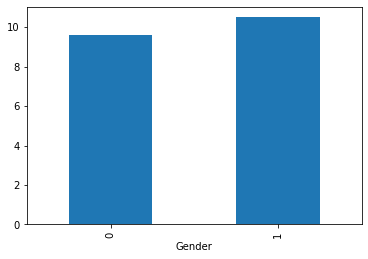

In [22]:
df.groupby('Gender').Delay.mean().plot(kind='bar');

Although they are close, females more tend to delay than males.

In [23]:
df.Gender.value_counts()  #Is the result related to the number of females?

1    71840
0    38687
Name: Gender, dtype: int64

No, the number of females and males explains the number of female are more than double of males. 

In [24]:
df.groupby('Scholarship')['Gender'].value_counts() #Is the result related to having a scholarship?

Scholarship  Gender
0            1         62987
             0         36679
1            1          8853
             0          2008
Name: Gender, dtype: int64

No, females have more scholarship than males.

**Answer 2 : It is  clear that females are more likely to delay their appointments.**

## Q3: Do people delay more their appointment when they have no-scholarship?



<AxesSubplot:xlabel='No-show,Scholarship'>

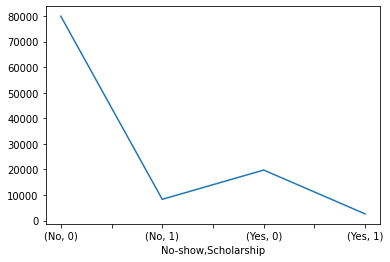

In [25]:
df.groupby('No-show').Scholarship.value_counts().plot(kind= 'line')

**Answer 3: People who have scholarship are more tend to appointment delay.**

## Q4: Is there any relationship between gender have scholarship and delay the appointment?


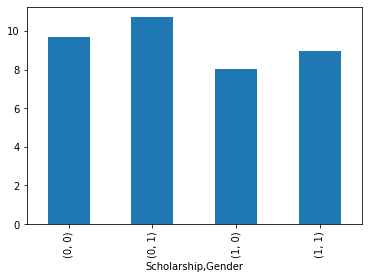

In [26]:
df.groupby(['Scholarship', 'Gender']).Delay.mean().plot(kind='bar');

**Answer: Both males and fames are delay more when they have no scholarship.**

## Q5: Which gender has more appointment in which illness?

In [32]:
def bar_plot():
    df.groupby('Gender').Hipertension.mean().plot(kind='bar', color='yellow')
    df.groupby('Gender').Diabetes.mean().plot(kind='bar', color='blue')
    df.groupby('Gender').Alcoholism.mean().plot(kind='bar', color='black')
    plt.legend();

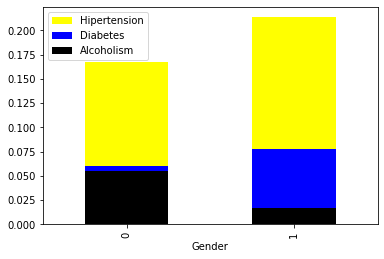

In [33]:
bar_plot()

**Answer 5: Females are more likely to make an appointment for hipertension. Males are more likely to make an appointment for alcoholism and females are more likely to make an appointment for diabetes.**

## Q6: Does a person suffer from alcoholism tend to delay appointments?

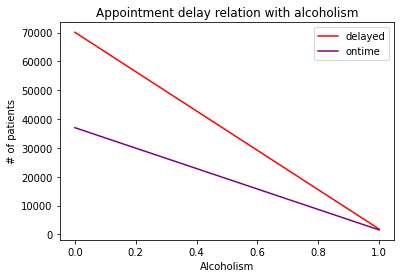

In [28]:
df.Alcoholism[delayed].value_counts().plot(kind='line', color= 'red', label='delayed')
df.Alcoholism[ontime].value_counts().plot(kind='line', color= 'purple', label='ontime')
plt.title('Appointment delay relation with alcoholism')
plt.xlabel('Alcoholism')
plt.ylabel('# of patients')
plt.legend();

In [29]:
df.Alcoholism[delayed].value_counts()

0    70137
1     1822
Name: Alcoholism, dtype: int64

In [30]:
df.Alcoholism.count()

110527

In [31]:
df.groupby('No-show').Alcoholism.count()

No-show
No     88208
Yes    22319
Name: Alcoholism, dtype: int64

**Answer 6 : No, people suffer from alcoholism less tend to delay.**

# Conclusion

 To conclude, medical appointments in Brazil data used for this project. There are six main questions to find out what could be the reason for delaying of appointments. 
 According to the findings, age has not a significant affect on delaying a medical appointment, however, it may be said that people younger than 35 were most dedicatedly attend their appointments. It was expected that people between 37-55 ages have mostly delay because of they are the major group. Moreover, gender has an effect, clearly shown that females are more likely to delay their appointments. On the other hand, having a scholarship has no possitive effect on appointments. The data explains that patients have a scholarship are more likely to delay their appointments. There is a point to highlight, the number of patients who is able to have a scholarship is a minority. Also, I wonder if the reason of delay could be related with the illness itself. For exploring, firstly checked the gender and illness relation. In accordance of Brazil data, females have more appointments for Diabetes, while males have more appointments for Alcholism. Afterwards, the last question focused on the Alcholism and delay relation to find out that although males are delaying less compared to females, the illness is whether the main reason or not. The data explains that there is a negative relation between alcholism and tend to delay. 

*Limitation of Analysis:*

It is not preferred to use any statistical test because Delay is taken as dependent variable, which has limitations by its sample size(==178). 

I.e. when tried to find out whether there is a relation between gender and number of delay days, the p-value was greater than 1 in chi-square test, which is exactly 3.5. It is impossible having greater than %100 percent of change to reject a hypothesis. 